In [1]:
!pip install -q deepeval

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [2]:
import os
import json
import pickle
import pandas as pd
import numpy as np
from deepeval import evaluate
from deepeval.test_case import LLMTestCase, LLMTestCaseParams
from deepeval.metrics import AnswerRelevancyMetric, HallucinationMetric, GEval, FaithfulnessMetric, ContextualPrecisionMetric, ContextualRecallMetric, ContextualRelevancyMetric
from deepeval.metrics.ragas import RagasMetric

In [13]:
os.environ["OPENAI_API_KEY"] = "sk-i4M0nJhXwuDGQC7r9h_OTlSp37Wy-OLyuvHIjFeB5-T3BlbkFJakmlbQn1X7RQNtuhGBFMnqqJxJ0JnA02aikgBtr-YA"

In [4]:
df = pd.read_csv("Capstone_Evaluation_Dataset.csv")
# df2 = pd.read_csv("questions_and_responses_8bitllama.csv")
# df3 = pd.read_csv("questions_and_responses_8bitllama_changed_prompt_1.csv")
# df4 = pd.read_csv("questions_and_responses_16bitllama.csv")
# df5 = pd.read_csv("questions_and_responses_8bitllama_changed_prompt_2.csv")
# df6 = pd.read_csv("hockey.csv")
# df7 = pd.read_csv("questions_and_responses_qwen14bcontextnew.csv")
# df8 = pd.read_csv("questions_and_responses_llama3.1_8b-instruct-fp16.csv")
df9 = pd.read_csv("questions_and_responses_qwen2.5_32b-instruct-q6_K.csv")
# df10 = pd.read_csv("questions_and_responses_hermes3_8b-llama3.1-fp16.csv")
# df = pd.read_csv("tennis_questions.csv")
# df = pd.read_csv("hockey.csv")

In [5]:
df.sample()

Question        AI Model  \
315  When will the equestrian events start, and how...  ChatGPT GPT-4o   

                                              Response Accuracy  \
315  The equestrian events for the Paris 2024 Olymp...   Medium   

    Comprehensiveness Additional Details     Agent Context  
315          Detailed  Few small details  Schedule     NaN

In [ ]:
df2.sample()

Question  \
51  What is the significance of the Paris 2024 Oly...   

                                             Response  \
51  The Paris 2024 Olympic emblem has significant ...   

                     AI Model  Agent  
51  llama3.1:8b-instruct-q8_0  Other

In [ ]:
df3.sample()

Question  \
57  Which tennis players are representing Japan in...   

                                             Response  \
57  Based on the information retrieved from the to...   

                     AI Model   Agent  
57  llama3.1:8b-instruct-q8_0  Tennis

In [ ]:
df4.sample()

Question  \
49  Which players advanced to the quarterfinals in...   

                                             Response  \
49  Based on the search results, it appears that I...   

                     AI Model  Agent  
49  llama3.1:8b-instruct-fp16  Other

In [ ]:
df5.sample()

Question  \
47  Did any new records get set in Olympic tennis ...   

                                             Response  \
47  Unfortunately, I was unable to find any inform...   

                     AI Model  Agent  
47  llama3.1:8b-instruct-q8_0  Other

In [ ]:
df6.sample()

Question  \
63  Which team had the highest penalty shootout sc...   

                   AI Model  \
63  Agent based GPT-4o-mini   

                                             Response Accuracy  \
63  - In the 2024 Olympics, India had the highest ...      NaN   

   Comprehensiveness Additional Details Agent  \
63               NaN                NaN   NaN   

                                              Context  
63  4\n\n                  Date Gender          St...

In [ ]:
df7.sample()

Question  \
70  What were the scores in the final match of the...   

                                             Response              AI Model  \
70  The final match of the mixed team archery even...  qwen2.5:14b-instruct   

    Agent                                            Context  
70  Other  Official Paris 2024 Olympics schedule and resu...

In [ ]:
df8.sample()

Question  \
70  How is France involving local communities in t...   

                                             Response  \
70  France is involving local communities in the p...   

                     AI Model  Agent  \
70  llama3.1:8b-instruct-fp16  Other   

                                              Context  
70  Oct 17, 2023 ... With less than 300 days to go...

In [6]:
df9.sample()

Question  \
36  What are some of the most memorable moments fr...   

                                             Response  \
36  From the searches conducted, some of the most ...   

                     AI Model          Agent  \
36  qwen2.5:32b-instruct-q6_K  Skateboarding   

                                              Context  
36  Aug 12, 2024 ... Favourite moment from an athl...

In [ ]:
df10.sample()

Question  \
32  How does the skateboarding setup for Paris 202...   

                                             Response  \
32  \nThe skateboarding events at the Paris 2024 O...   

                    AI Model          Agent Context  
32  hermes3:8b-llama3.1-fp16  Skateboarding     NaN

In [ ]:
values = set()
q = []

for i in range(len(df.index)):
    values.add(df["AI Model"][i])

for i in range(len(df.index)):
    if df["AI Model"][i] not in ['ChatGPT GPT-4o', 'Gemini', 'Llama3', 'Our Model']:
        q.append(df["Question"][i])

In [14]:
questions = []
model_responses = []
context = []
gpt_responses = []
gemini_responses = []
meta_responses = []

for i in range(len(df.index)):
    if df["AI Model"][i] == "Agent based GPT-4o-mini":
        questions.append(df["Question"][i])
        model_responses.append(df["Response"][i])
        context.append(str(df["Context"][i]))
    if df["AI Model"][i] == "ChatGPT GPT-4o":
        gpt_responses.append(df["Response"][i])
    if df["AI Model"][i] == "Gemini":
        gemini_responses.append(df["Response"][i])
    if df["AI Model"][i] == "Meta AI":
        meta_responses.append(df["Response"][i])

In [ ]:
llama_8bit_questions = []
llama_8bit_responses = []
llama_8bit_gpt_responses = []

for i in range(len(df2.index)):
    if df2["Question"][i] in questions:
        llama_8bit_questions.append(df2["Question"][i])
        llama_8bit_responses.append(df2["Response"][i])

for i in llama_8bit_questions:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            llama_8bit_gpt_responses.append(df["Response"][j])

In [ ]:
llama_8bit_questions_changed_prompt_1 = []
llama_8bit_responses_changed_prompt_1 = []
llama_8bit_gpt_responses_changed_prompt_1 = []

for i in range(len(df3.index)):
    if df3["Question"][i] in questions:
        llama_8bit_questions_changed_prompt_1.append(df3["Question"][i])
        llama_8bit_responses_changed_prompt_1.append(df3["Response"][i])

for i in llama_8bit_questions_changed_prompt_1:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            llama_8bit_gpt_responses_changed_prompt_1.append(df["Response"][j])

In [ ]:
llama_16bit_questions = []
llama_16bit_responses = []
llama_16bit_gpt_responses = []

for i in range(len(df4.index)):
    if df4["Question"][i] in questions:
        llama_16bit_questions.append(df4["Question"][i])
        llama_16bit_responses.append(df4["Response"][i])

for i in llama_16bit_questions:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            llama_16bit_gpt_responses.append(df["Response"][j])

In [ ]:
llama_8bit_questions_changed_prompt_2 = []
llama_8bit_responses_changed_prompt_2 = []
llama_8bit_gpt_responses_changed_prompt_2 = []

for i in range(len(df5.index)):
    if df5["Question"][i] in questions:
        llama_8bit_questions_changed_prompt_2.append(df5["Question"][i])
        llama_8bit_responses_changed_prompt_2.append(df5["Response"][i])

for i in llama_8bit_questions_changed_prompt_2:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            llama_8bit_gpt_responses_changed_prompt_2.append(df["Response"][j])

In [ ]:
qwen_14b_questions = []
qwen_14b_responses = []
qwen_14b_context = []
qwen_14b_gpt_responses = []

for i in range(len(df7.index)):
    if df7["Question"][i] in questions:
        qwen_14b_questions.append(df7["Question"][i])
        qwen_14b_responses.append(df7["Response"][i])
        qwen_14b_context.append(str(df7["Context"][i]))

for i in qwen_14b_questions:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            qwen_14b_gpt_responses.append(df["Response"][j])

In [ ]:
llama_8b_instruct_fp16_questions = []
llama_8b_instruct_fp16_responses = []
llama_8b_instruct_fp16_context = []
llama_8b_instruct_fp16_gpt_responses = []

for i in range(len(df8.index)):
    if df8["Question"][i] in questions:
        llama_8b_instruct_fp16_questions.append(str(df8["Question"][i]))
        llama_8b_instruct_fp16_responses.append(str(df8["Response"][i]))
        llama_8b_instruct_fp16_context.append(str(df8["Context"][i]))

for i in llama_8b_instruct_fp16_questions:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            llama_8b_instruct_fp16_gpt_responses.append(df["Response"][j])

In [15]:
qwen_32b_instruct_6bit_questions = []
qwen_32b_instruct_6bit_responses = []
qwen_32b_instruct_6bit_context = []
qwen_32b_instruct_6bit_gpt_responses = []

for i in range(len(df9.index)):
    if df9["Question"][i] in questions:
        qwen_32b_instruct_6bit_questions.append(df9["Question"][i])
        qwen_32b_instruct_6bit_responses.append(df9["Response"][i])
        qwen_32b_instruct_6bit_context.append(str(df9["Context"][i]))

for i in qwen_32b_instruct_6bit_questions:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            qwen_32b_instruct_6bit_gpt_responses.append(df["Response"][j])

In [ ]:
hermes3_8b_fp16_questions = []
hermes3_8b_fp16_responses = []
hermes3_8b_fp16_context = []
hermes3_8b_fp16_gpt_responses = []

for i in range(len(df10.index)):
    if df10["Question"][i] in questions:
        hermes3_8b_fp16_questions.append(df10["Question"][i])
        hermes3_8b_fp16_responses.append(df10["Response"][i])
        hermes3_8b_fp16_context.append(str(df10["Context"][i]))

for i in hermes3_8b_fp16_questions:
    for j in range(len(df.index)):
        if df["Question"][j] == i and df["AI Model"][j] == "ChatGPT GPT-4o":
            hermes3_8b_fp16_gpt_responses.append(df["Response"][j])

In [16]:
print(len(questions))
print(len(model_responses))
print(len(context))
print(len(gpt_responses))
print(len(gemini_responses))
print(len(meta_responses))

100
100
100
100
100
100


In [ ]:
print(len(llama_8bit_questions))
print(len(llama_8bit_responses))
print(len(llama_8bit_gpt_responses))

92
92
92


In [ ]:
print(len(llama_8bit_questions_changed_prompt_1))
print(len(llama_8bit_responses_changed_prompt_1))
print(len(llama_8bit_gpt_responses_changed_prompt_1))

92
92
92


In [ ]:
print(len(llama_16bit_questions))
print(len(llama_16bit_responses))
print(len(llama_16bit_gpt_responses))

92
92
92


In [ ]:
print(len(llama_8bit_questions_changed_prompt_2))
print(len(llama_8bit_responses_changed_prompt_2))
print(len(llama_8bit_gpt_responses_changed_prompt_2))

92
92
92


In [ ]:
print(len(qwen_14b_questions))
print(len(qwen_14b_responses))
print(len(qwen_14b_context))
print(len(qwen_14b_gpt_responses))

92
92
92
92


In [ ]:
print(len(llama_8b_instruct_fp16_questions))
print(len(llama_8b_instruct_fp16_responses))
print(len(llama_8b_instruct_fp16_context))
print(len(llama_8b_instruct_fp16_gpt_responses))

92
92
92
92


In [17]:
print(len(qwen_32b_instruct_6bit_questions))
print(len(qwen_32b_instruct_6bit_responses))
print(len(qwen_32b_instruct_6bit_context))
print(len(qwen_32b_instruct_6bit_gpt_responses))

100
100
100
100


In [ ]:
print(len(hermes3_8b_fp16_questions))
print(len(hermes3_8b_fp16_responses))
print(len(hermes3_8b_fp16_context))
print(len(hermes3_8b_fp16_gpt_responses))

100
100
100
100


In [ ]:
# from deepeval.metrics import BaseMetric

# class RankingMetric(BaseMetric):
#     def __init__(self, threshold: float = 0.5, evaluation_model: str = "gpt-4o-mini", include_reason: bool = True, comparision_metric: BaseMetric = None):
#         self.threshold = threshold
#         self.evaluation_model = evaluation_model,
#         self.include_reason = include_reason,
#         self.comparision_metric = comparision_metric

#     def measure(self, test_case: LLMTestCase) -> float:


# ranking_metric = GEval(
#     name = "Ranking Metric",
#     model = "gpt-4o-mini",
#     evaluation_steps = [
#         "Check the input question",
#         "Check the metric name",
#         "Check the scores and reasons for different models",
#         "Rank the models based on the scores and reasons",
#         '''
#         Output the reason in the following format:
#         rank 1: model_name
#         rank 2: model_name
#         rank 3: model_name
#         rank 4: model_name
#         '''
#     ],
#     evaluation_params = [LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT]
# )

ranking_metric = GEval(
    name = "Ranking Metric",
    model = "gpt-4o-mini",
    evaluation_steps = [
        "Check the metric name form the input",
        "Check the questions, scores and reasons for different models",
        "You have to rank the models based on the scores and reasons for the provided questions",
        '''
        You have to output the reason in the following format with rank 1 being the best model and rank 4 being the worst model:
        rank 1: model_name
        rank 2: model_name
        rank 3: model_name
        rank 4: model_name
        '''
    ],
    evaluation_params = [LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT]
)

In [18]:
answer_relevency_metric = AnswerRelevancyMetric(
    threshold = 0.75,
    model = "gpt-4o-mini",
    include_reason = True
)

hallucination_metric = HallucinationMetric(
    threshold = 0.5,
    model = "gpt-4o-mini",
    include_reason = True
)

comprehensiveness_metric = GEval(
    name = "Comprehensiveness",
    model = "gpt-4o-mini",
    criteria = "How well the model is able to provide not only a correct answer but also cover different facets of the query.",
    evaluation_params = [LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT, LLMTestCaseParams.EXPECTED_OUTPUT]
)

accuracy_metric = GEval(
    name = "Accuracy",
    model = "gpt-4o-mini",
    criteria = "Determine whether the actual output is factually correct based on the expected output.",
    evaluation_params = [LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT, LLMTestCaseParams.EXPECTED_OUTPUT]
)

faithfulness_metric = FaithfulnessMetric(
    threshold = 0.75,
    model = "gpt-4o-mini",
    include_reason = True
)

ragas_metric = RagasMetric(
    threshold = 0.75,
    model = "gpt-4o-mini"
)

contextual_precision_metric = ContextualPrecisionMetric(
    threshold = 0.75,
    model = "gpt-4o-mini",
    include_reason = True
)

contextual_recall_metric = ContextualRecallMetric(
    threshold = 0.75,
    model = "gpt-4o-mini",
    include_reason = True
)

contextual_relevency_metric = ContextualRelevancyMetric(
    threshold = 0.75,
    model = "gpt-4o-mini",
    include_reason = True
)

metrics = [answer_relevency_metric, comprehensiveness_metric, accuracy_metric, faithfulness_metric, contextual_relevency_metric]
other_model_metrics = [answer_relevency_metric, comprehensiveness_metric, accuracy_metric]
# other_model_metrics = [accuracy_metric]

In [ ]:
model_test_cases = []
gpt_test_cases = []
gemini_test_cases = []
meta_test_cases = []

for i in range(len(questions)):
    model_test_cases.append(LLMTestCase(
        input = questions[i],
        actual_output = model_responses[i],
        expected_output = gpt_responses[i],
        # retrieval_context = [context[i]]
    ))
    gpt_test_cases.append(LLMTestCase(
        input = questions[i],
        actual_output = gpt_responses[i],
        expected_output = gpt_responses[i]
    ))
    gemini_test_cases.append(LLMTestCase(
        input = questions[i],
        actual_output = gemini_responses[i],
        expected_output = gpt_responses[i]
    ))
    meta_test_cases.append(LLMTestCase(
        input = questions[i],
        actual_output = meta_responses[i],
        expected_output = gpt_responses[i]
    ))

In [ ]:
llama_8bit_test_cases = []

for i in range(len(llama_8bit_questions)):
    llama_8bit_test_cases.append(LLMTestCase(
        input = llama_8bit_questions[i],
        actual_output = llama_8bit_responses[i],
        expected_output = llama_8bit_gpt_responses[i]
    ))

In [ ]:
llama_8bit_changed_prompt_1_test_cases = []

for i in range(len(llama_8bit_questions_changed_prompt_1)):
    llama_8bit_changed_prompt_1_test_cases.append(LLMTestCase(
        input = llama_8bit_questions_changed_prompt_1[i],
        actual_output = llama_8bit_responses_changed_prompt_1[i],
        expected_output = llama_8bit_gpt_responses_changed_prompt_1[i]
    ))

In [ ]:
llama_16bit_test_cases = []

for i in range(len(llama_16bit_questions)):
    llama_16bit_test_cases.append(LLMTestCase(
        input = llama_16bit_questions[i],
        actual_output = llama_16bit_responses[i],
        expected_output = llama_16bit_gpt_responses[i]
    ))

In [ ]:
llama_8bit_changed_prompt_2_test_cases = []

for i in range(len(llama_8bit_questions_changed_prompt_2)):
    llama_8bit_changed_prompt_2_test_cases.append(LLMTestCase(
        input = llama_8bit_questions_changed_prompt_2[i],
        actual_output = llama_8bit_responses_changed_prompt_2[i],
        expected_output = llama_8bit_gpt_responses_changed_prompt_2[i]
    ))

In [ ]:
qwen_14b_test_cases = []

for i in range(len(qwen_14b_questions)):
    qwen_14b_test_cases.append(LLMTestCase(
        input = qwen_14b_questions[i],
        actual_output = qwen_14b_responses[i],
        expected_output = qwen_14b_gpt_responses[i],
        retrieval_context = [qwen_14b_context[i]]
    ))

In [ ]:
llama_8b_instruct_fp16_test_cases = []

for i in range(len(llama_8b_instruct_fp16_questions)):
    llama_8b_instruct_fp16_test_cases.append(LLMTestCase(
        input = llama_8b_instruct_fp16_questions[i],
        actual_output = llama_8b_instruct_fp16_responses[i],
        expected_output = llama_8b_instruct_fp16_gpt_responses[i],
        retrieval_context = [llama_8b_instruct_fp16_context[i]]
    ))

In [19]:
qwen_32b_instruct_6bit_test_cases = []

for i in range(len(qwen_32b_instruct_6bit_questions)):
    qwen_32b_instruct_6bit_test_cases.append(LLMTestCase(
        input = qwen_32b_instruct_6bit_questions[i],
        actual_output = qwen_32b_instruct_6bit_responses[i],
        expected_output = qwen_32b_instruct_6bit_gpt_responses[i],
        retrieval_context = [qwen_32b_instruct_6bit_context[i]]
    ))

In [ ]:
hermes3_8b_fp16_test_cases = []

for i in range(len(hermes3_8b_fp16_questions)):
    hermes3_8b_fp16_test_cases.append(LLMTestCase(
        input = hermes3_8b_fp16_questions[i],
        actual_output = hermes3_8b_fp16_responses[i],
        expected_output = hermes3_8b_fp16_gpt_responses[i],
        retrieval_context = [hermes3_8b_fp16_context[i]]
    ))

In [ ]:
for i in test_cases:
    print(i.input)
    print("**********************")
    print(i.actual_output)
    print("**********************")
    print(i.expected_output)
    print("\n\n#################################\n\n")

NameError: name 'test_cases' is not defined

In [ ]:
for metric in metrics:
    scores = []
    reasons = []
    model_outputs = ""
    for i in range(len(test_cases)):
        metric.measure(test_cases[i])
        print(metric.success)
        print(metric.score)
        print(metric.reason)
        scores.append(metric.score)
        reasons.append(metric.reason)
        if i % 4 == 3:
            model_outputs += '''
            Metric: {}

            Our Model:
            Score: {},
            Reason: {}

            ChatGPT GPT-4o:
            Score: {},
            Reason: {}

            Gemini:
            Score: {},
            Reason: {}

            Meta AI:
            Score: {},
            Reason: {}
            '''.format(type(metric), scores[0], reasons[0], scores[1], reasons[1], scores[2], reasons[2], scores[3], reasons[3])
            ranking_test_case = LLMTestCase(
                input = test_cases[i].input,
                actual_output = model_outputs
            )

            scores = []
            reasons = []
            model_outputs = ""

            ranking_metric.measure(ranking_test_case)
            print(ranking_metric.success)
            print(ranking_metric.score)
            print(ranking_metric.reason)

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

True
1.0
The score is 1.00 because there were no irrelevant statements made in the output, providing a clear and focused response to the input question.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

False
0.6666666666666666
The score is 0.67 because the response included an irrelevant statement about the event schedule, which did not address the specific question about the tennis match surface.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

False
0.7333333333333333
The score is 0.73 because while the response provides useful information about tennis tournaments, it includes several irrelevant statements regarding dates, venues, tournament formats, and match formats that do not directly address the selection criteria for players in the Olympics.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

True
0.8618835831650093
rank 1: Our Model
rank 2: Meta AI
rank 3: Gemini
rank 4: ChatGPT GPT-4o


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

True
1.0
The score is 1.00 because the response directly addresses the question about Rafael Nadal's Olympic tennis medals without any irrelevant statements.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

True
1.0
The score is 1.00 because the response directly addresses the question about the gold medal winner in men’s singles tennis at the 2024 Paris Olympics without any irrelevant statements.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

False
0.625
The score is 0.62 because there were several irrelevant statements that did not directly address the question regarding the ages of the youngest and oldest tennis players, such as achievements and tournament formats. These distractions prevented a higher score, but the relevant information provided still contributed to a partial understanding of the topic.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

False
0.3333333333333333
The score is 0.33 because the output included several irrelevant statements about the next Olympic Games and historical figures that did not address the specific inquiry about new records set in 2023.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

True
0.8163393797730827
rank 1: Our Model
rank 2: ChatGPT GPT-4o
rank 3: Gemini
rank 4: Meta AI


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

False
0.5714285714285714
The score is 0.57 because there are several irrelevant statements that do not directly answer how the weather has impacted tennis match schedules, such as details about weather warnings, tournament dates, player counts, event types, tournament structure, and match formats.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

False
0.3333333333333333
The score is 0.33 because there are several irrelevant statements that do not directly address the question of which players advanced to the quarterfinals in mixed doubles. Specific mentions of players' losses and unrelated match outcomes detract from the relevance of the answer.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

False
0.5555555555555556
The score is 0.56 because while the output provided some context about Djokovic's career, it included several irrelevant details that did not answer the specific question regarding his performance in the first-round match at the 2024 Olympics.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

True
1.0
The score is 1.00 because the response directly addresses the question about the top-seeded players in men’s and women’s tennis for the Paris Olympics without any irrelevant statements.


Output()

Event loop is already running. Applying nest_asyncio patch to allow async execution...

True
0.9320156667829806
rank 1: Meta AI
rank 2: Our Model
rank 3: Gemini
rank 4: ChatGPT GPT-4o


KeyboardInterrupt: 

In [ ]:
model_result = evaluate(model_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 00:38,  2.40test case/s]



Metrics Summary

  - ❌ Accuracy (GEval) (score: 0.3630800281205645, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output lists events and details, but lacks key narrative context and highlights specific athletes and competition significance present in the expected output., error: None)

For test case:

  - input: Tell me all athletics events on August 4th in Paris 2024.
  - actual output: On August 4th, 2024, the following athletics events will take place at the Paris Olympics:

1. **3000m steeplechase round 1 - women's**
   - **Time:** 10:05 - 10:05
   - **Location:** Stade de France
   - **Closest Metro:** Stade de France - Saint-Denis (RER D)

2. **Hammer throw qualification A - women's**
   - **Time:** 10:20 - 10:20
   - **Location:** Stade de France
   - **Closest Metro:** Stade de France - Saint-Denis (RER D)

3. **200m round 1 - women's**
   - **Time:** 10:55 - 10:55
   - **Location:** Stade de France
   - **Closest Metro:** Stade de France -

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
gpt_result = evaluate(gpt_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 01:41,  1.10s/test case]




Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 1.00 because there are no irrelevant statements in the actual output, providing a clear and direct response to the question., error: None)
  - ✅ Comprehensiveness (GEval) (score: 1.0, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output precisely matches the Expected Output, providing the correct date and time for the men's 100m final and relevant details about the preliminary rounds and semi-finals., error: None)

For test case:

  - input: When is the men's 100m finals in Paris 2024?
  - actual output: The men’s 100m final at the Paris 2024 Olympics is scheduled for Sunday, August 4, at 21:50 CEST (Paris local time). The competition begins the day before, on August 3, with the preliminary rounds and heats starting in the morning. The semi-finals and final rounds will both take place on August 4, with the semi-fin

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
gemini_result = evaluate(gemini_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 02:33,  1.67s/test case]




Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 1.00 because the response directly addresses the question about the competitors for Brazil in the men's street qualifiers for Paris 2024 without any irrelevant information., error: None)
  - ❌ Comprehensiveness (GEval) (score: 0.3952671915331566, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output lists more athletes than the Expected Output and includes additional details about their backgrounds, but it fails to mention how the skaters secured their spots based on rankings and performances, which is a critical aspect of the query., error: None)
  - ❌ Accuracy (GEval) (score: 0.3616200084929462, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output lists six athletes while the expected output specifies only three, highlighting a discrepancy in the number of representatives for Bra

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
meta_result = evaluate(meta_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 02:40,  1.75s/test case]




Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 1.00 because the response directly addresses the request for athletics events on August 4th in Paris 2024 without including any irrelevant information., error: None)
  - ❌ Comprehensiveness (GEval) (score: 0.3697850814413981, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output lists several athletics events but lacks details about key finals and prominent athletes, which are present in the expected output. It also provides additional non-athletics events, which deviates from the focused request., error: None)
  - ❌ Accuracy (GEval) (score: 0.22689414213699952, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output lists several women's and men's athletics events, but it lacks key events mentioned in the expected output, such as the Men's 100m Final and Women's High Jump Final, whic

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
llama_8bit_result = evaluate(llama_8bit_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 00:42,  2.19test case/s]




Metrics Summary

  - ✅ Accuracy (GEval) (score: 0.7324822670967792, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output lists the correct categories and mentions the event dates, but it lacks the phrase 'standard tennis categories featured in Olympic competitions' found in the expected output., error: None)

For test case:

  - input: In what categories will tennis players compete in the 2024 Paris Olympics?
  - actual output: The categories in which tennis players will compete in the 2024 Paris Olympics are:

* Men's singles
* Women's singles
* Men's doubles
* Women's doubles
* Mixed doubles

These events will take place on the clay courts of Roland Garros from July 27 to August 4, 2024.
  - expected output: Tennis players at the 2024 Paris Olympics will compete in the following five categories:

1. Men's Singles
2. Women's Singles
3. Men's Doubles
4. Women's Doubles
5. Mixed Doubles
These are the standard tennis categories featured in Olympic com

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0
}

ar = []
comp = []
acc = []

for i in range(len(llama_8bit_result.test_results)):
    ar.append(llama_8bit_result.test_results[i].metrics_data[0].score)
    comp.append(llama_8bit_result.test_results[i].metrics_data[1].score)
    acc.append(llama_8bit_result.test_results[i].metrics_data[2].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)
agg["Accuracy (GEval)"] = sum(acc) / len(acc)

agg

{'Answer Relevancy': 0.7415068563523941,
 'Comprehensiveness (GEval)': 0.37054618751291385,
 'Accuracy (GEval)': 0.3139193911017841}

In [ ]:
llama_8bit_changed_prompt_1_result = evaluate(llama_8bit_changed_prompt_1_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 01:34,  1.03s/test case]




Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 1.00 because the output directly addresses the question about the nearest metro to Stade de France for Paris 2024 without any irrelevant statements., error: None)
  - ❌ Comprehensiveness (GEval) (score: 0.29269910547458494, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output mentions only one station, Saint-Denis (RER D), while the Expected Output provides multiple nearby stations and additional context regarding distances and transportation options, lacking clarity and completeness., error: None)

For test case:

  - input: Which is the nearest metro to Stade de France for Paris 2024?
  - actual output: The nearest metro to Stade de France for Paris 2024 is Saint-Denis (RER D).
  - expected output: For the Paris 2024 Olympics, **Stade de France** will be served by the following nearby metro and RER (regional trai

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0
}

ar = []
comp = []

for i in range(len(llama_8bit_changed_prompt_1_result.test_results)):
    ar.append(llama_8bit_changed_prompt_1_result.test_results[i].metrics_data[0].score)
    comp.append(llama_8bit_changed_prompt_1_result.test_results[i].metrics_data[1].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)

agg

{'Answer Relevancy': 0.7290643233578017,
 'Comprehensiveness (GEval)': 0.3429772096986959}

In [ ]:
llama_16bit_result = evaluate(llama_16bit_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 00:43,  2.12test case/s]




Metrics Summary

  - ❌ Accuracy (GEval) (score: 0.353554474843029, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: While the actual output lists event times and locations, it lacks the specific details about star athletes and key highlights outlined in the expected output., error: None)

For test case:

  - input: Tell me all athletics events on August 4th in Paris 2024.
  - actual output: The closest metro to the Stade de France is Saint-Denis (RER D). The start times for the matches are as follows:

* August 4, 1005: Athletics 3000m steeplechase round 1 - women's
* August 4, 1020: Athletics hammer throw qualification a - women's
* August 4, 1055: Athletics 200m round 1 - women's
* August 4, 1100: Athletics long jump qualification - men's
* August 4, 1145: Athletics hammer throw qualification b - women's
* August 4, 1150: Athletics 110m hurdles round 1 - men's
* August 4, 1235: Athletics 400m hurdles round 1 - women's
* August 4, 1905: Athletics 400m round 1 - 

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0
}

ar = []
comp = []
acc = []

for i in range(len(llama_16bit_result.test_results)):
    ar.append(llama_16bit_result.test_results[i].metrics_data[0].score)
    comp.append(llama_16bit_result.test_results[i].metrics_data[1].score)
    acc.append(llama_16bit_result.test_results[i].metrics_data[2].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)
agg["Accuracy (GEval)"] = sum(acc) / len(acc)

agg

{'Answer Relevancy': 0.8408445570130353,
 'Comprehensiveness (GEval)': 0.42123868445845736,
 'Accuracy (GEval)': 0.3640635376428417}

In [ ]:
llama_8bit_changed_prompt_2_result = evaluate(llama_8bit_changed_prompt_2_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 01:36,  1.05s/test case]




Metrics Summary

  - ❌ Answer Relevancy (score: 0.5, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 0.50 because the output included an irrelevant statement about 'python_repl_ast', which does not relate to the requested athletics events on August 4th in Paris 2024., error: None)
  - ❌ Comprehensiveness (GEval) (score: 0.12689414331667112, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output is a code snippet that does not provide any information about the athletics events on August 4, 2024, failing to address the query, while the Expected Output offers a comprehensive list of events., error: None)

For test case:

  - input: Tell me all athletics events on August 4th in Paris 2024.
  - actual output: {"name": "python_repl_ast", "parameters": {"query": "df[(df["date"] == 'august 4') & (df['sport'] == 'athletics')]"}}
  - expected output: On August 4, 2024, the athletics events at the Paris Olympics feature severa

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0
}

ar = []
comp = []

for i in range(len(llama_8bit_changed_prompt_2_result.test_results)):
    ar.append(llama_8bit_changed_prompt_2_result.test_results[i].metrics_data[0].score)
    comp.append(llama_8bit_changed_prompt_2_result.test_results[i].metrics_data[1].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)

agg

{'Answer Relevancy': 0.7244798076319817,
 'Comprehensiveness (GEval)': 0.3473483848378372}

In [ ]:
qwen_14b_result = evaluate(qwen_14b_test_cases, other_model_metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |██████████|100% (92/92) [Time Taken: 02:23,  1.56s/test case]




Metrics Summary

  - ❌ Answer Relevancy (score: 0.5, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 0.50 because while there is relevant information regarding swimming events, the mention of 'Paris 2024 Olympics' distracts from directly answering the question about the schedule., error: None)
  - ❌ Comprehensiveness (GEval) (score: 0.2203288291599947, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output incorrectly states August 1st as the start date, while the Expected Output specifies July 27, 2024. It lacks details on the events scheduled for that day and the overall swimming schedule., error: None)
  - ❌ Accuracy (GEval) (score: 0.0014063624103687398, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output incorrectly states the first day of swimming events as August 1st, while the expected output clearly states it is July 27, 2024., error: None)

For test case:

  - input: Whe

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0,
    "Accuracy (GEval)": 0
}

ar = []
comp = []
acc = []

for i in range(len(qwen_14b_result.test_results)):
    ar.append(qwen_14b_result.test_results[i].metrics_data[0].score)
    comp.append(qwen_14b_result.test_results[i].metrics_data[1].score)
    acc.append(qwen_14b_result.test_results[i].metrics_data[2].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)
agg["Accuracy (GEval)"] = sum(acc) / len(acc)

agg

{'Answer Relevancy': 0.7451301577731784,
 'Comprehensiveness (GEval)': 0.4477326100597489,
 'Accuracy (GEval)': 0.3844044513276056}

In [ ]:
qwen_14b_small_result = evaluate(qwen_14b_test_cases, metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Faithfulness Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Relevancy Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |          |  0% (0/92) [Time Taken: 00:00, ?test case/s]ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceed



Metrics Summary

  - ❌ Answer Relevancy (score: 0.6, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 0.60 because while some relevant information was provided, several statements did not address the specific inquiry about the men's 100m finals in Paris 2024, affecting the overall relevance., error: None)
  - ❌ Comprehensiveness (GEval) (score: 0.15441598614755483, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output fails to provide the specific date and time for the men's 100m finals, as requested in the input, and only indicates a lack of information instead of answering the query., error: None)
  - ❌ Accuracy (GEval) (score: 0.05418039515346297, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output fails to provide the factual information requested about the men's 100m finals, instead stating a lack of data, which does not align with the expected output that specifies the event

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0,
    "Accuracy (GEval)": 0,
    "Faithfulness": 0,
    "Contextual Relevancy": 0
}

ar = []
comp = []
acc = []
faith = []
cont = []

for i in range(len(qwen_14b_small_result.test_results)):
    ar.append(qwen_14b_small_result.test_results[i].metrics_data[0].score)
    comp.append(qwen_14b_small_result.test_results[i].metrics_data[1].score)
    acc.append(qwen_14b_small_result.test_results[i].metrics_data[2].score)
    faith.append(qwen_14b_small_result.test_results[i].metrics_data[3].score)
    cont.append(qwen_14b_small_result.test_results[i].metrics_data[4].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)
agg["Accuracy (GEval)"] = sum(acc) / len(acc)
agg["Faithfulness"] = sum(faith) / len(faith)
agg["Contextual Relevancy"] = sum(cont) / len(cont)

agg

{'Answer Relevancy': 0.819259434642232,
 'Comprehensiveness (GEval)': 0.45239275212773045,
 'Accuracy (GEval)': 0.3839850879880215,
 'Faithfulness': 0.8827594977131422,
 'Contextual Relevancy': 0.31954796411318137}

In [ ]:
with open("qwen_14b_result_4bit.pkl", "wb") as infile:
    pickle.dump(qwen_14b_small_result, infile)

In [ ]:
qwen_14b_result_instruct = evaluate(qwen_14b_test_cases, metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Faithfulness Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Relevancy Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |          |  0% (0/92) [Time Taken: 00:00, ?test case/s]ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceed



Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 1.00 because the output directly addresses the seeding process for the individual archery events at the Paris 2024 Olympics without any irrelevant statements., error: None)
  - ❌ Comprehensiveness (GEval) (score: 0.49646674291831705, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output provides some relevant information about how athletes are typically seeded, but it lacks the specific details about the preliminary ranking round and the scoring system used for the Paris 2024 Olympics, which are critical to fully answering the main question., error: None)
  - ❌ Accuracy (GEval) (score: 0.39646674279184957, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output describes general seeding methods and factors but lacks the specific details about the preliminary ranking round and the 72 a

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0,
    "Accuracy (GEval)": 0,
    "Faithfulness": 0,
    "Contextual Relevancy": 0
}

ar = []
comp = []
acc = []
faith = []
cont = []

for i in range(len(qwen_14b_result_instruct.test_results)):
    ar.append(qwen_14b_result_instruct.test_results[i].metrics_data[0].score)
    comp.append(qwen_14b_result_instruct.test_results[i].metrics_data[1].score)
    acc.append(qwen_14b_result_instruct.test_results[i].metrics_data[2].score)
    faith.append(qwen_14b_result_instruct.test_results[i].metrics_data[3].score)
    cont.append(qwen_14b_result_instruct.test_results[i].metrics_data[4].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)
agg["Accuracy (GEval)"] = sum(acc) / len(acc)
agg["Faithfulness"] = sum(faith) / len(faith)
agg["Contextual Relevancy"] = sum(cont) / len(cont)

agg

{'Answer Relevancy': 0.8166283008245248,
 'Comprehensiveness (GEval)': 0.4708095639828041,
 'Accuracy (GEval)': 0.40171750587327204,
 'Faithfulness': 0.8409773552676363,
 'Contextual Relevancy': 0.3675673662086706}

In [ ]:
with open("qwen_14b_result_2.5_14b_instruct_q8.0.pkl", "wb") as infile:
    pickle.dump(qwen_14b_result_instruct, infile)

In [ ]:
llama_8b_instruct_fp16_result = evaluate(llama_8b_instruct_fp16_test_cases, metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Faithfulness Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Relevancy Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 92 test case(s) in parallel: |          |  0% (0/92) [Time Taken: 00:00, ?test case/s]ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceeded. Retrying: 1 time(s)...
ERROR:root:OpenAI rate limit exceed



Metrics Summary

  - ✅ Answer Relevancy (score: 1.0, threshold: 0.75, strict: False, evaluation model: gpt-4o-mini, reason: The score is 1.00 because the response directly addressed the question about the gold medal winner in men’s singles tennis at the 2024 Paris Olympics without any irrelevant statements., error: None)
  - ✅ Comprehensiveness (GEval) (score: 0.6747824966948083, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output correctly identifies Novak Djokovic as the winner and includes the score of the match, but it lacks additional context about the significance of the win and the location of the event, which are present in the Expected Output., error: None)
  - ✅ Accuracy (GEval) (score: 0.7152824448504244, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The actual output accurately identifies Novak Djokovic as the gold medal winner and provides the match score, but it lacks additional context regarding the significan

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

In [ ]:
agg = {
    "Answer Relevancy": 0,
    "Comprehensiveness (GEval)": 0,
    "Accuracy (GEval)": 0,
    "Faithfulness": 0,
    "Contextual Relevancy": 0
}

ar = []
comp = []
acc = []
faith = []
cont = []

for i in range(len(llama_8b_instruct_fp16_result.test_results)):
    ar.append(llama_8b_instruct_fp16_result.test_results[i].metrics_data[0].score)
    comp.append(llama_8b_instruct_fp16_result.test_results[i].metrics_data[1].score)
    acc.append(llama_8b_instruct_fp16_result.test_results[i].metrics_data[2].score)
    faith.append(llama_8b_instruct_fp16_result.test_results[i].metrics_data[3].score)
    cont.append(llama_8b_instruct_fp16_result.test_results[i].metrics_data[4].score)

agg["Answer Relevancy"] = sum(ar) / len(ar)
agg["Comprehensiveness (GEval)"] = sum(comp) / len(comp)
agg["Accuracy (GEval)"] = sum(acc) / len(acc)
agg["Faithfulness"] = sum(faith) / len(faith)
agg["Contextual Relevancy"] = sum(cont) / len(cont)

agg

{'Answer Relevancy': 0.7832349413871151,
 'Comprehensiveness (GEval)': 0.4018116679128122,
 'Accuracy (GEval)': 0.3433405135060134,
 'Faithfulness': 0.8571789020158584,
 'Contextual Relevancy': 0.3592865769496204}

In [ ]:
with open("llama_8b_instruct_fp16_result.pkl", "wb") as infile:
    pickle.dump(llama_8b_instruct_fp16_result, infile)

In [20]:
qwen_32b_instruct_6bit_result = evaluate(qwen_32b_instruct_6bit_test_cases, metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Faithfulness Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Relevancy Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 100 test case(s) in parallel: |          |  0% (0/100) [Time Taken: 02:08, ?test case/s]


APIConnectionError: Connection error.

In [ ]:
hermes3_8b_fp16_result = evaluate(hermes3_8b_fp16_test_cases, metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Accuracy (GEval) Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Faithfulness Metric! (using gpt-4o-mini, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Relevancy Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 100 test case(s) in parallel: |          |  0% (0/100) [Time Taken: 03:17, ?test case/s]


APIConnectionError: Connection error.

In [ ]:
model_result

EvaluationResult(test_results=[TestResult(success=False, metrics_data=[MetricData(name='Answer Relevancy', threshold=0.75, success=True, score=0.875, reason='The score is 0.88 because while the response provided useful information about skateboarding competitions, the mention of events in both park and street disciplines was not directly relevant to the question about the number of countries participating.', strict_mode=False, evaluation_model='gpt-4o-mini', error=None, evaluation_cost=0.0006277499999999999, verbose_logs='Statements:\n[\n    "At the Paris 2024 Olympics, skateboarding will feature athletes from a diverse range of countries.",\n    "The competitions will include events in both park and street disciplines for men and women.",\n    "Men\'s Park countries: USA, BRA (Brazil), AUS (Australia), ESP (Spain), PUR (Puerto Rico), JPN (Japan), SWE (Sweden), DEN (Denmark), ITA (Italy), NOR (Norway), FRA (France), GBR (Great Britain), PHL (Philippines), ARG (Argentina), RSA (South Af

In [ ]:
# all_results = [model_result, gpt_result, gemini_result, meta_result]
# all_models = ["Agent based GPT-4o-mini", "ChatGPT GPT-4o", "Gemini", "Meta AI"]
# final_results = {}
# metric_names = [
#     "Answer Relevancy",
#     "Comprehensiveness (GEval)",
#     "Faithfulness",
#     "Contextual Relevancy"
# ]

# for ind in range(len(all_results)):
#     for i in all_results[ind].test_results:
#         if i.input not in final_results.keys():
#             final_results[i.input] = []
#         final_results[i.input].append([i.actual_output, i.expected_output, i.retrieval_context, {}])
#         for metric in i.metrics_data:
#             if metric.name not in final_results[i.input][ind][3].keys():
#                 final_results[i.input][ind][3][metric.name] = []
#             final_results[i.input][ind][3][metric.name].append(metric.score)
#             final_results[i.input][ind][3][metric.name].append(metric.reason)


# for question in questions:
#     for ind in range(len(all_models)):
#         for metric in metric_names:
#             if metric not in final_results[question][ind][3].keys():
#                 final_results[question][ind][3][metric] = [None, None]



all_results = [model_result, gemini_result, meta_result]
all_models = ["Agent based GPT-4o-mini", "Gemini", "Meta AI"]
final_results = {}
metric_names = [
    "Answer Relevancy",
    "Comprehensiveness (GEval)",
    "Accuracy (GEval)",
    "Faithfulness",
    "Contextual Relevancy"
]

for ind in range(len(all_results)):
    for i in all_results[ind].test_results:
        if i.input not in final_results.keys():
            final_results[i.input] = {}
        final_results[i.input][all_models[ind]] = [i.actual_output, i.expected_output, i.retrieval_context, {}]
        for metric in i.metrics_data:
            if metric.name not in final_results[i.input][all_models[ind]][3].keys():
                final_results[i.input][all_models[ind]][3][metric.name] = []
            final_results[i.input][all_models[ind]][3][metric.name].append(metric.score)
            final_results[i.input][all_models[ind]][3][metric.name].append(metric.reason)


for question in questions:
    for ind in range(len(all_models)):
        for metric in metric_names:
            if metric not in final_results[question][all_models[ind]][3].keys():
                final_results[question][all_models[ind]][3][metric] = [None, None]


with open("final_results.json", "w") as outfile:
    json.dump(final_results, outfile, indent = 4)




# for i in model_result.test_results:
#     if i.input not in final_results.keys():
#         final_results[i.input] = [[i.actual_output, i.expected_output, {}]]
#     for metric in i.metrics_data:
#         if metric.name not in final_results[i.input][0][2].keys():
#             final_results[i.input][0][2][metric.name] = [metric.score, metric.reason]

# for i in gpt_result.test_results:
#     final_results[i.input].append([i.actual_output, i.expected_output, {}])
#     for metric in i.metrics_data:
#         if metric.name not in final_results[i.input][1][2].keys():
#             final_results[i.input][1][2][metric.name] = [metric.score, metric.reason]

# for i in gemini_result.test_results:
#     final_results[i.input].append([i.actual_output, i.expected_output, {}])
#     for metric in i.metrics_data:
#         if metric.name not in final_results[i.input][2][2].keys():
#             final_results[i.input][2][2][metric.name] = [metric.score, metric.reason]

# for i in meta_result.test_results:
#     final_results[i.input].append([i.actual_output, i.expected_output, {}])
#     for metric in i.metrics_data:
#         if metric.name not in final_results[i.input][3][2].keys():
#             final_results[i.input][3][2][metric.name] = [metric.score, metric.reason]

In [ ]:
print(final_results["How many countries have athletes in the skateboarding events at the 2024 Olympics?"]["Agent based GPT-4o-mini"][3])

{'Answer Relevancy': [0.056338028169014086, 'The score is 0.06 because the output included numerous irrelevant individual country names and event titles, failing to address the overall question about the total number of countries participating in skateboarding events.'], 'Comprehensiveness (GEval)': [0.49646674130155494, 'The Actual Output provides detailed country listings and mentions multiple events, but it inaccurately states there are 15 countries instead of the 23 specified in the Expected Output, indicating a lack of completeness.'], 'Accuracy (GEval)': [0.3559622126276548, 'The actual output mentions at least 15 different countries, while the expected output states there are 23 countries. Additionally, it lacks details on the number of athletes and specific qualification processes.'], 'Faithfulness': [None, None], 'Contextual Relevancy': [None, None]}


In [ ]:
# avg_metric_scores = {}

# for metric in metric_names:
#     avg_metric_scores[metric] = {}
#     for model in all_models:
#         avg_metric_scores[metric][model] = 0

# for metric in metric_names:
#     for i in range(len(all_models)):
#         metric_scores = []
#         for question in questions:
#             if metric in final_results[question][i][3].keys() and final_results[question][i][3][metric][0] is not None:
#                 metric_scores.append(final_results[question][i][3][metric][0])
#         if len(metric_scores) != 0:
#             avg_metric_scores[metric][all_models[i]] = sum(metric_scores) / len(metric_scores)

# print(avg_metric_scores)


avg_metric_scores = {}

for metric in metric_names:
    avg_metric_scores[metric] = {}
    for model in all_models:
        avg_metric_scores[metric][model] = 0

for metric in metric_names:
    for i in range(len(all_models)):
        metric_scores = []
        for question in questions:
            if metric in final_results[question][all_models[i]][3].keys() and final_results[question][all_models[i]][3][metric][0] is not None:
                metric_scores.append(final_results[question][all_models[i]][3][metric][0])
        if len(metric_scores) != 0:
            avg_metric_scores[metric][all_models[i]] = sum(metric_scores) / len(metric_scores)

print(avg_metric_scores)

with open("average_scores.json", "w") as outfile:
    json.dump(avg_metric_scores, outfile, indent = 4)

{'Answer Relevancy': {'Agent based GPT-4o-mini': 0.7697099097194726, 'Gemini': 0.8507343168527379, 'Meta AI': 0.7329013839244022}, 'Comprehensiveness (GEval)': {'Agent based GPT-4o-mini': 0.539351787031162, 'Gemini': 0.4977526710689811, 'Meta AI': 0.5368613867811559}, 'Accuracy (GEval)': {'Agent based GPT-4o-mini': 0.45575623454704123, 'Gemini': 0.44811303477053643, 'Meta AI': 0.45163025568061027}, 'Faithfulness': {'Agent based GPT-4o-mini': 0, 'Gemini': 0, 'Meta AI': 0}, 'Contextual Relevancy': {'Agent based GPT-4o-mini': 0, 'Gemini': 0, 'Meta AI': 0}}


In [ ]:
eval_df = pd.DataFrame(columns = [
    "Question",
    "AI Model",
    "Response",
    "Context",
    "Answer Relevancy",
    "Answer Relevancy Reason",
    "Comprehensiveness",
    "Comprehensiveness Reason",
    "Accuracy",
    "Accuracy Reason",
    "Faithfulness",
    "Faithfulness Reason",
    "Contextual Relevancy",
    "Contextual Relevancy Reason"
])

In [ ]:
for i in range(len(df.index)):
    if df["AI Model"][i] in all_models:
        row = {
            "Question": df["Question"][i],
            "AI Model": df["AI Model"][i],
            "Response": df["Response"][i],
            "Context": df["Context"][i],
            "Answer Relevancy": final_results[df["Question"][i]][df["AI Model"][i]][3]["Answer Relevancy"][0],
            "Answer Relevancy Reason": final_results[df["Question"][i]][df["AI Model"][i]][3]["Answer Relevancy"][1],
            "Comprehensiveness": final_results[df["Question"][i]][df["AI Model"][i]][3]["Comprehensiveness (GEval)"][0],
            "Comprehensiveness Reason": final_results[df["Question"][i]][df["AI Model"][i]][3]["Comprehensiveness (GEval)"][1],
            "Faithfulness": final_results[df["Question"][i]][df["AI Model"][i]][3]["Faithfulness"][0],
            "Faithfulness Reason": final_results[df["Question"][i]][df["AI Model"][i]][3]["Faithfulness"][1],
            "Contextual Relevancy": final_results[df["Question"][i]][df["AI Model"][i]][3]["Contextual Relevancy"][0],
            "Contextual Relevancy Reason": final_results[df["Question"][i]][df["AI Model"][i]][3]["Contextual Relevancy"][1]
        }
        eval_df = eval_df._append(row, ignore_index = True)

eval_df

<ipython-input-38-b5f78b3f0872>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_df = eval_df._append(row, ignore_index = True)


Question  \
0       Tell me the schedule for javelin at Paris 2024   
1       Tell me the schedule for javelin at Paris 2024   
2       Tell me the schedule for javelin at Paris 2024   
3    Tell me all athletics events on August 4th in ...   
4    Tell me all athletics events on August 4th in ...   
..                                                 ...   
271  Who are the ambassadors for the Paris 2024 Oly...   
272  Who are the ambassadors for the Paris 2024 Oly...   
273  What is the mascot for the Paris 2024 Olympics...   
274  What is the mascot for the Paris 2024 Olympics...   
275  What is the mascot for the Paris 2024 Olympics...   

                    AI Model  \
0    Agent based GPT-4o-mini   
1                     Gemini   
2                    Meta AI   
3    Agent based GPT-4o-mini   
4                     Gemini   
..                       ...   
271                   Gemini   
272                  Meta AI   
273  Agent based GPT-4o-mini   
274                   Gemini   
275                  Meta AI   

                                              Response  \
0    Here is the schedule for javelin events at the...   
1    The men's javelin throw at the 2024 Summer Oly...   
2    The javelin throw event at Paris 2024 is sched...   
3    On August 4th, 2024, the following athletics e...   
4    On August 4th, 2024, the Paris Olympics will f...   
..                                                 ...   
271  The Paris 2024 Olympic Games have several amba...   
272  The ambassadors for the Paris 2024 Olympics ar...   
273  The mascot for the Paris 2024 Olympics is name...   
274  The mascots for the Paris 2024 Olympics are th...   
275  The mascot for the Paris 2024 Olympics is the ...   

                                               Context  Answer Relevancy  \
0              Date      Sport                     ...          1.000000   
1                                                  NaN          1.000000   
2                                                  NaN          1.000000   
3             Date      Sport                      ...          0.875000   
4                                                  NaN          1.000000   
..                                                 ...               ...   
271                                                NaN          1.000000   
272                                                NaN          0.466667   
273  The Paris 2024 Olympic mascot, Phryge, represe...          1.000000   
274                                                NaN          0.857143   
275                                                NaN          1.000000   

                               Answer Relevancy Reason  Comprehensiveness  \
0    The score is 1.00 because the response directl...           0.507388   
1    The score is 1.00 because the response provide...           0.507720   
2    The score is 1.00 because the response directl...           0.458607   
3    The score is 0.88 because the output included ...           0.662072   
4    The score is 1.00 because the response directl...           0.363419   
..                                                 ...                ...   
271  The score is 1.00 because the response directl...           0.422588   
272  The score is 0.47 because there are several ir...           0.379036   
273  The score is 1.00 because the response directl...           0.670572   
274  The score is 0.86 because while the response p...           0.679671   
275  The score is 1.00 because all information prov...           0.754416   

                              Comprehensiveness Reason Accuracy  \
0    The Actual Output provides a detailed schedule...      NaN   
1    The Actual Output provides the schedule for me...      NaN   
2    While the Actual Output provides some details ...      NaN   
3    The Actual Output lists all athletics events o...      NaN   
4    The Actual Output includes some athletics even...      NaN   
..                         

In [ ]:
eval_df.to_csv("Capstone_Evaluation_Dataset_Accuracy_Scores.csv", index = False)

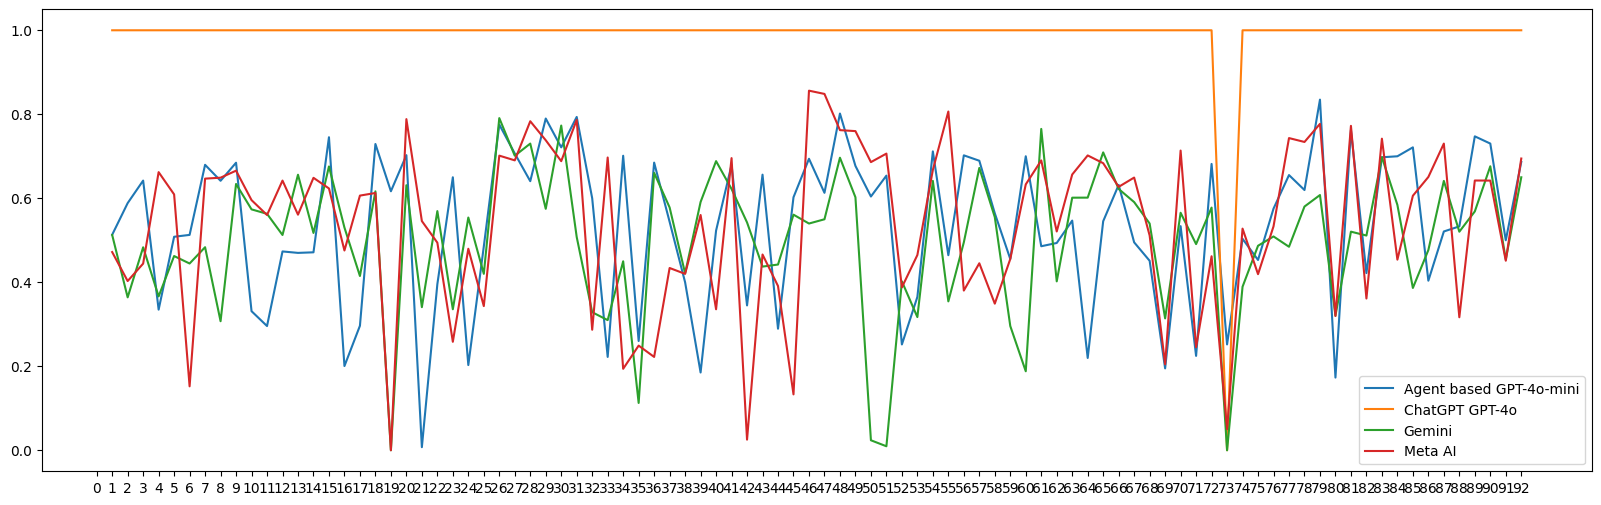

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 6))

for i in range(len(all_models)):
    metric_scores = []
    for question in questions:
        metric_scores.append(final_results[question][i][2]["Comprehensiveness (GEval)"][0])
    x = np.array([i + 1 for i in range(len(questions))])
    y = np.array(metric_scores)
    plt.plot(x, y, label = all_models[i])

plt.xticks(np.arange(0, len(questions) + 1, step = 1))
plt.legend()
plt.show()

In [ ]:
evaluate(ranking_test_cases, [ranking_metric])

✨ You're running DeepEval's latest Ranking Metric (GEval) Metric! (using gpt-4o-mini, strict=False, 
async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 2 test case(s) in parallel: |██████████|100% (2/2) [Time Taken: 00:01,  1.12test case/s]



Metrics Summary

  - ✅ Ranking Metric (GEval) (score: 0.878787451132174, threshold: 0.5, strict: False, evaluation model: gpt-4o-mini, reason: The Actual Output ranks the models accurately based on their scores and reasons, with clear distinctions between them, but lacks the explicit ranking format requested., error: None)

For test case:

  - input: Comprehensiveness (GEval)
  - actual output: 
Model: Our Model
Score: 0.8055611602151698
Reason: The Actual Output correctly identifies the competition categories, matching the Expected Output, but provides additional details about the tournament format and schedule that enhance understanding.
Score: 0.7229450870423969
Reason: The Actual Output correctly identifies the surface as clay and mentions the venue, but it lacks the specific connection to Roland Garros being the home of the French Open and incorrectly states the year since clay was last used at the Olympics.
Score: 0.6035332560466709
Reason: The Actual Output provides a clear ov

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

EvaluationResult(test_results=[TestResult(success=True, metrics_data=[MetricData(name='Ranking Metric (GEval)', threshold=0.5, success=True, score=0.878787451132174, reason='The Actual Output ranks the models accurately based on their scores and reasons, with clear distinctions between them, but lacks the explicit ranking format requested.', strict_mode=False, evaluation_model='gpt-4o-mini', error=None, evaluation_cost=0.0007243499999999998, verbose_logs='Criteria:\nNone \n \nEvaluation Steps:\n[\n    "Check the metric name form the input",\n    "Check the questions, scores and reasons for different models",\n    "You have to rank the models based on the scores and reasons for the provided questions",\n    "\n        You have to output the reason in the following format with rank 1 being the best model and rank 4 being the worst model:\n        rank 1: model_name\n        rank 2: model_name\n        rank 3: model_name\n        rank 4: model_name\n        "\n]')], conversational=False, 

In [ ]:

temp_test_case = LLMTestCase(
    input = "Who won the gold medal in the women's individual archery event at the Paris 2024 Olympics?",
    actual_output = '''At the Paris 2024 Olympics, the gold medal in the women's individual archery event was won by **Lim Sihyeon** from South Korea. The silver medal went to **Nam Suhyeon**, also from South Korea, while the bronze medal was claimed by **Lisa Barbelin** from France.

The women's individual archery competition took place at Les Invalides, featuring 64 competitors who participated in the ranking round and subsequent elimination matches.''',
    expected_output = "Lim Sihyeon of South Korea won the gold medal in the women's individual archery event at the Paris 2024 Olympics. She defeated her fellow South Korean competitor, Nam Suhyeon, with a score of 7-3 in the final match. France's Lisa Barbelin secured the bronze medal by winning 6-4 against another South Korean archer, Jeon Hunyoung​.",
    retrieval_context = [
'''
Jul 9, 2024 ... Individual competitions at the Games begin with the ranking round, where each of the 64 archers shoot 72 arrows to determine their ranking for ... Aug 10, 2024 ... Women's individual ; Medalists ; Gold: Lim Sihyeon ; Silver: Nam Suhyeon ; Bronze: Barbelin Lisa. Official Paris 2024 Olympics schedule and results for Archery. Find results as they happen - which athletes are taking home medals. The women's individual archery event is one of five archery events at the 2024 Summer Olympics. It is being held at Les Invalides. There are 64 competitors ... Jul 25, 2024 ... Official competition schedule and live results for Archery - Women's Individual at the Paris 2024 Olympics (Jul 26-Aug 11, 2024) Aug 1, 2024 ... After winning gold and silver, respectively, earlier this week, in women's individual foil, Lee Kiefer and Lauren Scruggs led the U.S. squad ... Aug 11, 2024 ... A complete list of Paris Olympics medal winners · ATHLETICS. WOMEN'S MARATHON. Gold: Netherlands (Sifan Hassan) · BASKETBALL. WOMEN'S · CYCLING ... Jul 28, 2024 ... Americans win gold in swimming and fencing while men's basketball and women's soccer teams cruised to victory Sunday in France. Aug 1, 2024 ... Paris 2024 Summer Olympics and Paralympics. Watch all the action from ... All three American archers are out of the women's individual event. Aug 3, 2024 ... Paris 2024 Olympics - Archery - Women's Individual Victory Ceremony ... gold medal in the women's team event earlier in the Games. But ...
''']
)

In [ ]:
evaluate([temp_test_case], metrics)

✨ You're running DeepEval's latest Answer Relevancy Metric! (using gpt-4o, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Comprehensiveness (GEval) Metric! (using gpt-4o, strict=False, 
async_mode=True)...

✨ You're running DeepEval's latest Faithfulness Metric! (using gpt-4o, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Precision Metric! (using gpt-4o, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Recall Metric! (using gpt-4o, strict=False, async_mode=True)...

✨ You're running DeepEval's latest Contextual Relevancy Metric! (using gpt-4o, strict=False, async_mode=True)...

Event loop is already running. Applying nest_asyncio patch to allow async execution...


Evaluating 1 test case(s) in parallel: |          |  0% (0/1) [Time Taken: 00:00, ?test case/s]

None


Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:13, 13.66s/test case]



Metrics Summary

  - ❌ Answer Relevancy (score: 0.2, threshold: 0.75, strict: False, evaluation model: gpt-4o, reason: The score is 0.20 because the response contains multiple irrelevant details about other participants and event specifics, rather than focusing on who won the gold medal, which was the main query., error: None)
  - ✅ Comprehensiveness (GEval) (score: 0.7927814864922189, threshold: 0.5, strict: False, evaluation model: gpt-4o, reason: The Actual Output correctly names the gold medalist, Lim Sihyeon, and includes additional details about the event venue and competitors, addressing the main question effectively. However, it lacks specific match scores mentioned in the Expected Output, such as the 7-3 win in the final, and omits the opponent Jeon Hunyoung in the bronze medal match., error: None)
  - ✅ Faithfulness (score: 1.0, threshold: 0.75, strict: False, evaluation model: gpt-4o, reason: The score is 1.00 because there are no contradictions between the actual output a

✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI. 
‼️  Friendly reminder 😇: You can also run evaluations with ALL of deepeval's metrics directly on Confident AI 
instead.

EvaluationResult(test_results=[TestResult(success=False, metrics_data=[MetricData(name='Answer Relevancy', threshold=0.75, success=False, score=0.2, reason='The score is 0.20 because the response contains multiple irrelevant details about other participants and event specifics, rather than focusing on who won the gold medal, which was the main query.', strict_mode=False, evaluation_model='gpt-4o', error=None, evaluation_cost=0.0057374999999999995, verbose_logs='Statements:\n[\n    "At the Paris 2024 Olympics, the gold medal in the women\'s individual archery event was won by Lim Sihyeon from South Korea.",\n    "The silver medal went to Nam Suhyeon, also from South Korea.",\n    "The bronze medal was claimed by Lisa Barbelin from France.",\n    "The women\'s individual archery competition took place at Les Invalides.",\n    "64 competitors participated in the ranking round and subsequent elimination matches."\n] \n \nVerdicts:\n[\n    {\n        "verdict": "yes",\n        "reason": nul